## Hierachical Clustering

In [ ]:
# The following analysis looks at the arrest rates for murder, assault and rape per 100,000 inhabitants, along
# with the urban population estimates across the US states. The aim of the project is to use Hierachical clustering,
# an unsupervised clustering algorithm, to determine groups of states with similar characteristics. 
# The dataset used is the USArrest data, provided by R.

In [1]:
# Load libraries
%matplotlib inline 

import pandas as pd
import numpy as np
from sklearn import cluster, metrics
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster
from scipy.spatial.distance import pdist
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [2]:
# Load data
df = pd.read_csv('datasets/USArrests.csv')
df = df.rename(columns={'Unnamed: 0': 'States'})
df.head()

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [19]:
# Displace covariance matrix

rates = df.ix[:,'Murder':]
covariance_matrix = pd.DataFrame(np.cov(rates.T), columns = rates.columns, index = rates.columns)
covariance_matrix

,Murder,Assault,UrbanPop,Rape
Murder,18.970465,291.062367,4.386204,22.991412
Assault,291.062367,6945.165714,312.275102,519.269061
UrbanPop,4.386204,312.275102,209.518776,55.768082
Rape,22.991412,519.269061,55.768082,87.729159


In [21]:
# Scaling the data using StandardScaler

# It is important to scale the data when conducting Principal Component Ananlysis. The reason for this is because 
# PCA seeks to maximize the variance of each component. By looking at the covariance matrix we see that PCA will try
# and project as much as possible in the direction of assault, since the variance is much greater. This will lead
# to assault dominating other features.

# The standard scaler ensures that each features scales to unit variance and zero mean
sc = StandardScaler()
X = sc.fit_transform(rates)

In [67]:
# Covariance matrix after normalisation

covariance_matrix = pd.DataFrame(np.cov(X.T), columns = rates.columns, index = rates.columns)
covariance_matrix

,Murder,Assault,UrbanPop,Rape
Murder,1.020408,0.818238,0.070992,0.575080
Assault,0.818238,1.020408,0.264155,0.678818
UrbanPop,0.070992,0.264155,1.020408,0.419736
Rape,0.575080,0.678818,0.419736,1.020408


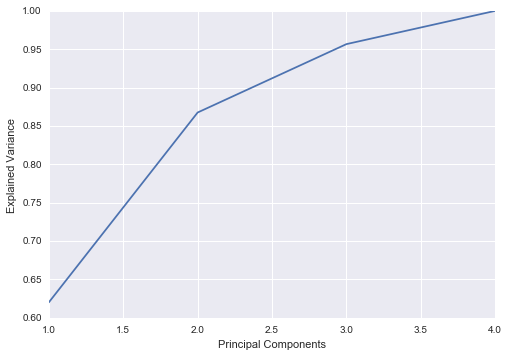

In [33]:
# Principal Component Analysis

pca = PCA(n_components = 4)
X_reduced = pca.fit_transform(X)
explained_variance = pca.explained_variance_ratio_ 
cumulative_variance = np.cumsum(explained_variance)

plt.plot(range(1, 5), cumulative_variance)
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.show()

In [35]:
# As shown by the above plot, just two of the principal components explain a total of 87% of the variance in the data.

In [37]:
# Principal Component Analysis with two components

pca = PCA(n_components = 2)
X_reduced = pca.fit_transform(X)
df_pca = pd.DataFrame(X_reduced, columns=['PC1','PC2'])
df_pca['States'] = df.States
df_pca.head()

,PC1,PC2,States
0,0.985566,1.133392,Alabama
1,1.950138,1.073213,Alaska
2,1.763164,-0.745957,Arizona
3,-0.141420,1.119797,Arkansas
4,2.523980,-1.542934,California


In [39]:
# Perform Hierachical Clustering on original dataset

Z = linkage(X, 'ward')
c, coph_dists = cophenet(Z, pdist(X))
print 'Cophenetic Coefficient: ', c
print 'Cophentic Distance: ', coph_dists.mean()

Cophenetic Coefficient:  0.697526563237
Cophentic Distance:  9.0571324845


In [53]:
# The cophentic coefficient is a measure of comparison between the Euclidean distances and the hierachical
# distances of the transformed data. The closer the value is to one the better the distances are preserved.

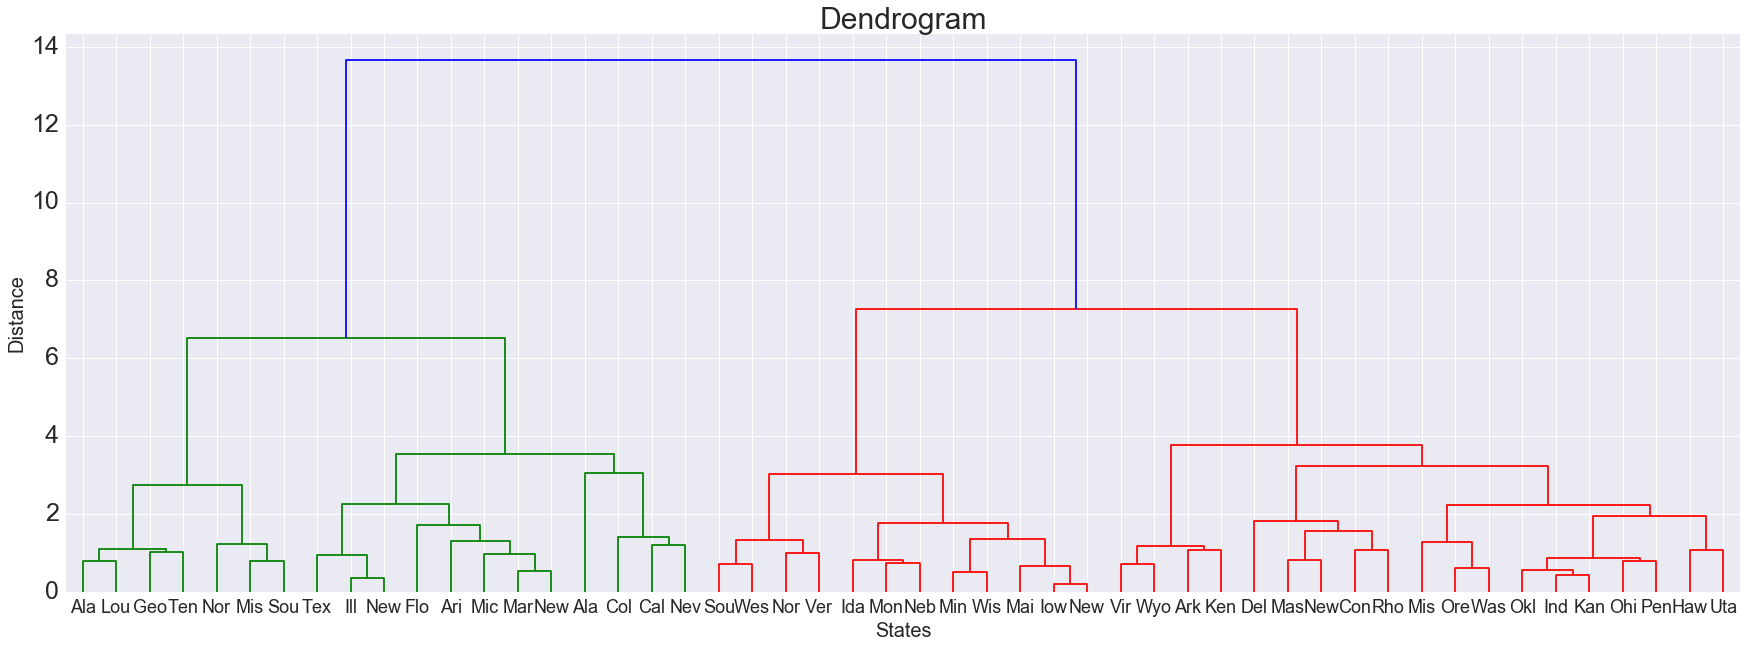

In [55]:
# Plot Dendogram

plt.figure(figsize=(30, 10))
plt.title('Dendrogram', fontsize = 30)
plt.xlabel('States', fontsize = 20)
plt.ylabel('Distance', fontsize = 20)
dendrogram(
    Z,
    leaf_rotation = 0,  
    leaf_font_size = 18,
    labels = [state[:3] for state in df.States],
)
plt.yticks(fontsize = 25)
plt.show()

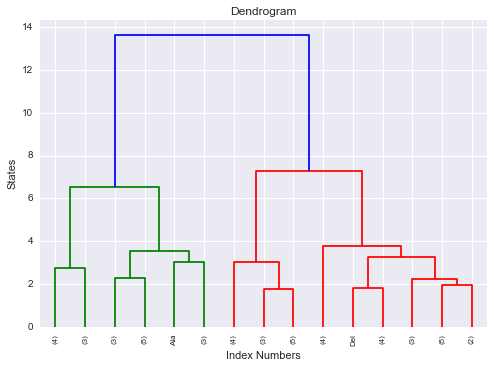

In [45]:
# Truncated Dundogram

plt.title('Dendrogram')
plt.xlabel('Index Numbers')
plt.ylabel('States')
dendrogram(
    Z,
    truncate_mode = 'lastp',
    p = 15,
    leaf_rotation=90.,  
    leaf_font_size=8.,
    labels = [state[:3] for state in df.States],
)
plt.show()

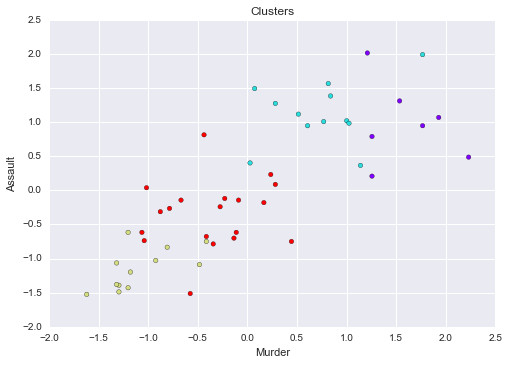

In [52]:
# Cutting the dendogram leading to four clusters

clusters = fcluster(Z, 4, criterion ='distance')

plt.figure()
plt.title('Clusters')
plt.scatter(X[:,0], X[:,1], c = clusters, cmap='rainbow', s = 20 )
plt.xlabel('Murder')
plt.ylabel('Assault')
plt.show()

In [56]:
# Perform Hierachical Clustering on PCA transformed dataset

Z = linkage(X_reduced, 'ward')
c, coph_dists = cophenet(Z, pdist(X_reduced))
print 'Cophenetic Coefficient: ', c
print 'Cophentic Distance: ', coph_dists.mean()

Cophenetic Coefficient:  0.719008123903
Cophentic Distance:  8.90946031209


In [ ]:
# By using the principal components the cophentic coefficient has increased, meaning we have a better
# preservation of distance

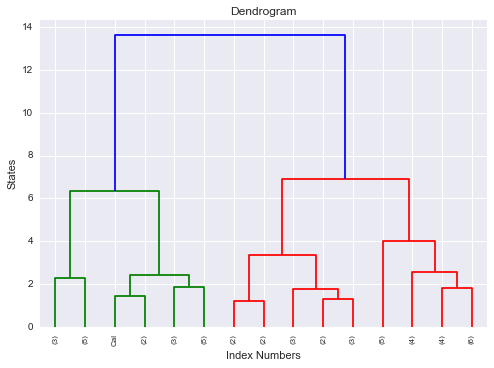

In [58]:
# Truncated Dundogram

plt.title('Dendrogram')
plt.xlabel('Index Numbers')
plt.ylabel('States')
dendrogram(
    Z,
    truncate_mode = 'lastp',
    p = 15,
    leaf_rotation=90.,  
    leaf_font_size=8.,
    labels = [state[:3] for state in df_pca.States],
)
plt.show()

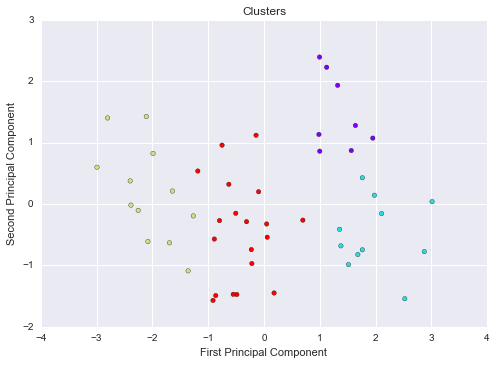

In [59]:
# Cutting the dendogram leading to four clusters

clusters = fcluster(Z, 6, criterion ='distance')

plt.figure()
plt.title('Clusters')
plt.scatter(df_pca['PC1'], df_pca['PC2'], c = clusters, cmap='rainbow', s = 20 )
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

In [ ]:
# By plotting on the principal components we see that the cluster are more distinct.

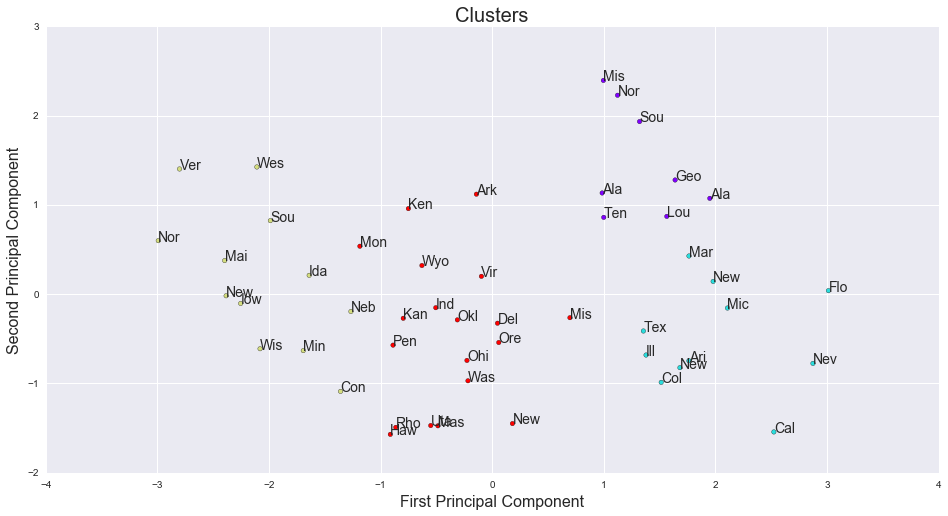

In [62]:
# Labelled scatter plot

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
plt.title('Clusters', fontsize = 20)
ax.scatter(df_pca['PC1'], df_pca['PC2'], c = clusters, cmap='rainbow', s = 20 )
for i, xi in enumerate(df_pca['States']):
    ax.annotate(xi[:3], (df_pca.iloc[i,0], df_pca.iloc[i,1]), fontsize=14)
plt.xlabel('First Principal Component',fontsize=16)
plt.ylabel('Second Principal Component',fontsize=16)
plt.show()


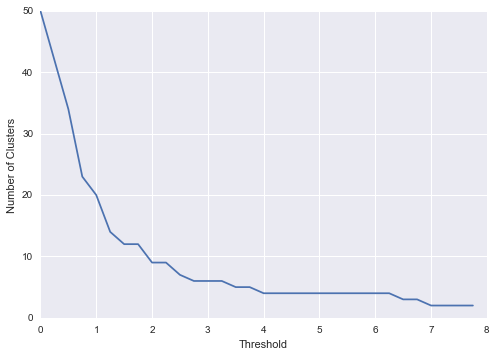

In [66]:
# Threshold Vs Number of clusters

threshold = np.arange(0, 8, 0.25)
number_clusters = []

for i in threshold:
    clusters = fcluster(Z, i, criterion='distance')
    number_clusters.append(clusters.max())
    
plt.plot(threshold, number_clusters)
plt.xlabel('Threshold')
plt.ylabel('Number of Clusters')
plt.show()